In [1]:
# imports


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
from env import get_connection

import warnings
warnings.filterwarnings("ignore")

import acquire

In [2]:
querry = """
       SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips, propertylandusetypeid FROM properties_2017
JOIN propertylandusetype USING(propertylandusetypeid)
WHERE propertylandusetypeid = 261;
        """

def get_zillow_data():
    '''
    This function reads in zillow data from Codeup database using sql querry into a df, 
    writes data to a csv file if a local file doesn't exist, and return df and if a local file exists
    return return df
    '''
    
    filename = "zillow.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql(querry, get_connection('zillow'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename, index=False)

        # Return the dataframe to the calling code
        return df  

In [3]:
# acquire data using a function
df = get_zillow_data()

# peak into data
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


In [4]:
# get number of rows and columns
df.shape

(2152863, 8)

In [13]:
# drop propertylandusetypeid
df.drop(columns='propertylandusetypeid',inplace=True)

In [14]:
# peak into data to see if column has dropped
df.head(3)
df.info()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0


In [35]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [36]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [16]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [18]:
# check for Null
# find the total number of Null values in each column
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [30]:
for col in df.columns:
    print(col)
    print(df[col].value_counts(dropna=False, ascending=True))
    print('____________________________')
    

bedroomcnt
25.0         1
16.0         2
18.0         3
15.0         6
14.0         7
NaN         11
12.0        12
13.0        16
11.0        34
10.0       121
9.0        291
8.0       1107
7.0       4807
0.0      13187
1.0      23166
6.0      25166
5.0     150866
2.0     335473
4.0     634289
3.0     964298
Name: bedroomcnt, dtype: int64
____________________________
bathroomcnt
19.00         1
32.00         1
19.50         1
14.50         1
12.50         3
11.50         3
1.75          3
17.00         4
20.00         6
18.00         8
NaN          11
16.00        12
10.50        14
0.50         16
15.00        17
14.00        25
13.00        39
9.50         50
12.00        73
8.50        110
11.00       146
10.00       325
7.50        384
9.00        713
6.50       1333
8.00       1692
7.00       4394
5.50       6217
6.00      10747
0.00      13027
4.50      19506
5.00      28362
3.50      28518
1.50      31211
4.00      82155
2.50     142981
1.00     414324
3.00     422841
2.00     

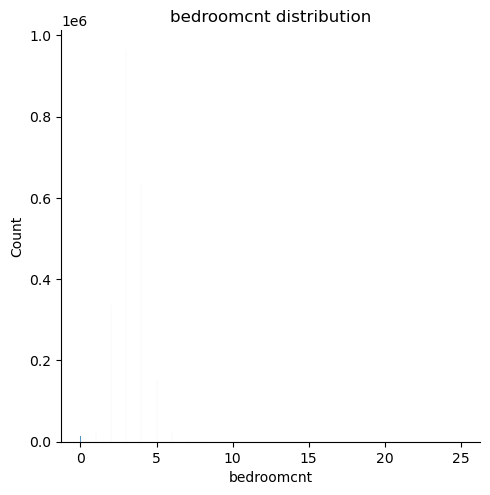

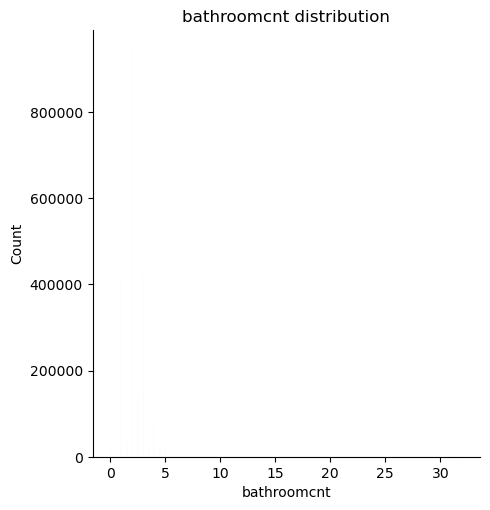

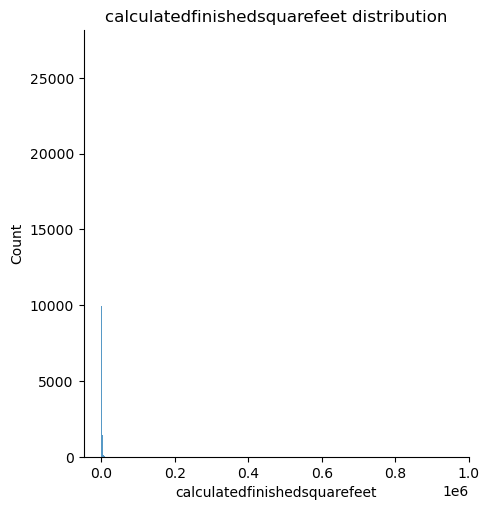

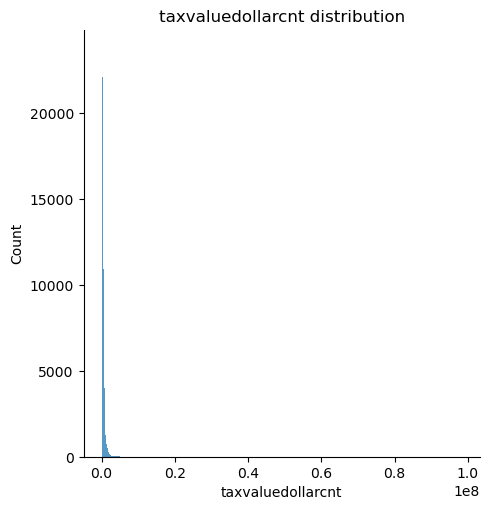

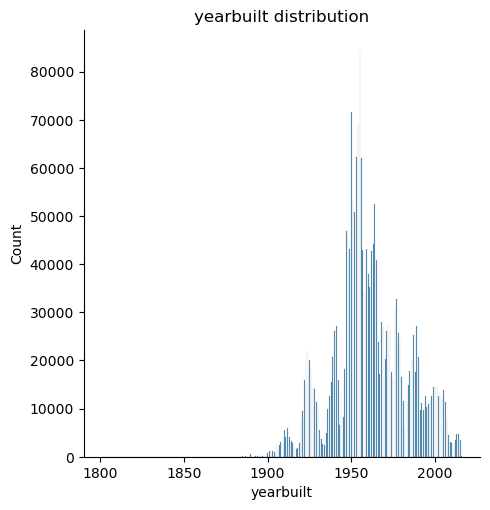

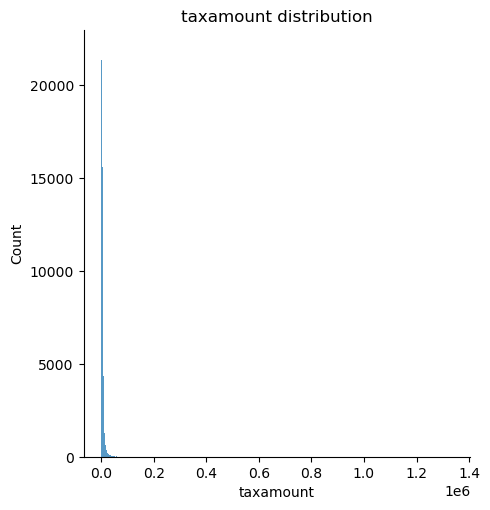

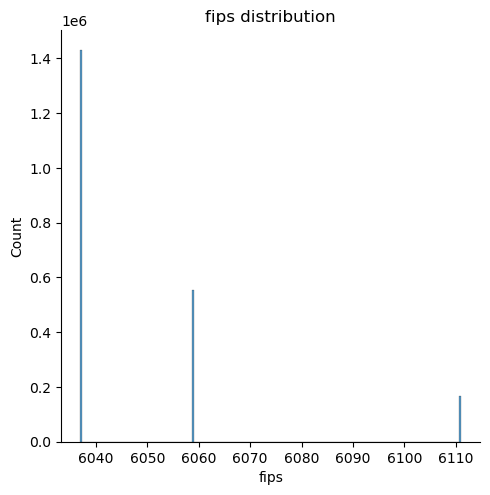

In [32]:
for col in df.columns:
    sns.displot(df[col])
    plt.title(f'{col} distribution')
    plt.show()

In [39]:
df.fillna(0,inplace=True)

In [40]:
# check for Null
# find the total number of Null values in each column
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64